In [1]:
import numpy as np
import matplotlib
matplotlib.rcParams['image.cmap'] = 'jet'
import matplotlib.pyplot as plt
from numba import jit

# Домашнее Задание 2.
Дедлайн - 15 апреля

Форма сдачи - jupyter notebook. Классрум - https://classroom.google.com/c/NjYxNjY4MjY3NDIw?cjc=pho754c

P.S Пожалуйста, аккуратно оформляйте графики, ориентироваться можно на этот [материал](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem02-charts.ipynb). У графиков обязательно должно быть:

- Название
- Подписанные оси
- Легенда, если необходимо (например, если несколько цветов на одном графике)
- Все должно быть четко видно и ничего не сливаться
- Непонятные и неаккуратные графики могут негативно сказаться на оценке

Также нельзя использовать готовые решения задач: например, если вам нужно решить СЛУ, то запрещено использовать [numpy.linalg.solve](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html), иначе 0 баллов. За неэффективное использование циклов также могут быть нежелательным - используйте векторные операции.

Все задачи весят одинаково.

# Задача 0.

В прикладных задачах нередко возникают ситуации, когда матрица  имеет очень много нулевых значений (разреженная матрица). Тогда хранить ее в обычном виде бывает затратно по потребляемой памяти. Для таких матриц существуют различные виды представлений, разберем один из них - COO (Coordinate Format), в котором храним тройки (строка, столбец, значение) для каждого ненулевого элемента

Например, матрица
$$
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 2 & 0\\
3 & 0 & 0 & 4
\end{pmatrix}
$$
 

будет иметь вид COO: (нумерация с $0$)

- Массив строк `row_indexes = [0, 1, 2, 2]`
- Массив столбцов `col_indexes = [0, 2, 0, 3]`
- Массив значений `values = [1, 2, 3, 4]`

В данной задаче нужно реализовать класс `Sparse` для разреженных матриц. Запрещено использовать готовые решения, циклы тоже.
Вам могут понадобиться следующие методы, но можете использовать шаблон по своему усмотрению. Главное сохраните общий вид

In [ ]:
class Sparse:
    """
    A class representing a sparse matrix.

    Attributes:
        rows (np.ndarray): An array containing row indices of non-zero elements.
        cols (np.ndarray): An array containing column indices of non-zero elements.
        values (np.ndarray): An array containing values of non-zero elements.
    """

    def __init__(self, rows: np.ndarray, cols: np.ndarray, values: np.ndarray):
        self.rows = rows
        self.cols = cols
        self.values = values

    def multiply(self, vector: np.ndarray) -> np.ndarray:
        """
        Performs matrix-vector multiplication with a given vector.

        Args:
            vector (np.ndarray): The vector to be multiplied with the sparse matrix.

        Returns:
            np.ndarray: The result of the multiplication.
        """
        # Your code here (∩ᄑ_ᄑ)⊃━☆ﾟ*･｡*
        pass

    def transpose(self):
        """
        Returns the transpose of the sparse matrix.

        Returns:
            Sparse: The transpose of the sparse matrix.
        """
        # Your code here (∩ᄑ_ᄑ)⊃━☆ﾟ*･｡*
        pass

    def get_row(self, row_index: int, col_slice: tuple[int]) -> np.ndarray:
        """
        Retrieves a specific row from the sparse matrix within the specified column slice.

        Args:
            row_index (int): The index of the row to retrieve.
            col_slice (tuple[int]): A tuple representing the start and end indices of the column slice.

        Returns:
            np.ndarray: The requested row.
        """
        # Your code here (∩ᄑ_ᄑ)⊃━☆ﾟ*･｡*
        pass

    def get_element(self, row_index: int, col_index: int):
        """
        Retrieves the value of a specific element in the sparse matrix.

        Args:
            row_index (int): The row index of the element.
            col_index (int): The column index of the element.

        Returns:
            float: The value of the specified element.
        """
        # Your code here (∩ᄑ_ᄑ)⊃━☆ﾟ*･｡*
        pass

    def to_dense(self):
        """
        Converts the sparse matrix to a dense matrix.

        Returns:
            np.ndarray: The dense matrix representation of the sparse matrix.
        """
        # Your code here (∩ᄑ_ᄑ)⊃━☆ﾟ*･｡*
        pass


In [ ]:
# Тесты для самопроверки

rows = np.array([0, 1, 2, 2])
cols = np.array([0, 1, 1, 2])
values = np.array([3, 4, 5, 6])
sparse_matrix = Sparse(rows, cols, values)

# Умножение матрицы на вектор
vector = np.array([1, 2, 3])
result = sparse_matrix.multiply(vector)
assert vector.size == result.size
assert np.max(np.absolute(result - np.array([3, 8, 28]))) < 1.0e-30


# Получить строку по индексу строки и диапазону столбцов
row_index = 2
column_start = 0
column_end = 3
row = sparse_matrix.get_row(row_index, (column_start, column_end))
assert row.size == column_end - column_start

# Получить элемент по индексу строки и столбца
element = sparse_matrix.get_element(2, 1)
assert abs(element - 5) < 1.0e-30

assert np.max(np.absolute(sparse_matrix.to_dense() - np.array([[3., 0., 0.],[0., 4., 0.],[0., 5., 6.]]))) < 1.0e-30

В следующих 3 заданиях используйте ваш реализованный класс для разреженных матриц

# Задача 1.
Релизуйте алгоритм решения системы линейных уравнений методом би-сопряженных градиентов для разреженных матриц.
Протестируйте его на задаче, описанной в функции `test_problem_1`.

Фукнции, требующие модификации содержат комментарий:
"НЕОБХОДИМО ПРИВЕСТИ К ФОРМАТУ РАЗРЕЖЕННЫХ МАТРИЦ".

In [2]:
def init_system_matrix_1d_problem_task_1(nx, nt):
    # инициализация тридиагональной матрицы системы линейных уравнений
    # НЕОБХОДИМО ПРИВЕСТИ К ФОРМАТУ РАЗРЕЖЕННЫХ МАТРИЦ
    dt = 1.0 / nt
    dx = 1.0 / nx
    smat = np.zeros((nx, nx))
    # diagonal elements
    smat[0, 0] = 1.0 + 0.5 * dt / dx / dx
    for idx in range(1, nx - 1):
        smat[idx, idx] = 1.0 + 1.0 * dt / dx / dx
    smat[nx - 1, nx - 1] = 1.0 + 0.5 * dt / dx / dx
    # off-diagonal elements
    for idx in range(0, nx - 1):
        smat[idx, idx + 1] = - 0.5 * dt / dx / dx
        smat[idx + 1, idx] = - 0.5 * dt / dx / dx
    return smat

def init_right_part_task_1(nx):
    # инициализация правой части
    xnode = np.linspace(0.5 / nx, 1.0 - 0.5 / nx, nx)
    b = 0.2 + 1.6 * np.cos(2.0 * np.pi * xnode) - 0.2 * np.sin(1.0 * np.pi * xnode)
    return b

Алгоритм бисопряженных градиентов без предобуславливания

In [3]:
def init_bcg(smat, y):
    # НЕОБХОДИМО ПРИВЕСТИ К ФОРМАТУ РАЗРЕЖЕННЫХ МАТРИЦ
    x0 = np.zeros(y.shape)
    r0 = y - np.dot(smat, x0)
    rh0 = r0.copy()
    d0 = r0.copy()
    dh0 = d0.copy()
    return x0, r0, rh0, d0, dh0

def single_step_bcg(smat, x0, r0, d0, rh0, dh0):
    # НЕОБХОДИМО ПРИВЕСТИ К ФОРМАТУ РАЗРЕЖЕННЫХ МАТРИЦ
    v0 = np.dot(smat, d0)
    vh0 = np.dot(np.transpose(smat), dh0)
    alpha = np.dot(rh0, r0) / np.dot(v0, dh0)
    x1 = x0 + alpha * d0

    r1 = r0 - alpha * v0
    rh1 = rh0 - alpha * vh0

    beta = np.dot(rh1, r1) / np.dot(rh0, r0)

    d1 = r1 + beta * d0
    dh1 = rh1 + beta * dh0
    return x1, r1, rh1, d1, dh1

def compute_solution_bcg(smat, bvec, niter):
    # НЕОБХОДИМО ПРИВЕСТИ К ФОРМАТУ РАЗРЕЖЕННЫХ МАТРИЦ
    x0, r0, d0, rh0, dh0 = init_bcg(smat, bvec)
    res = np.zeros((niter + 1))
    for kiter in range(niter):
        res[kiter] = np.sqrt(np.dot(r0, r0))
        x1, r1, d1, rh1, dh1 = single_step_bcg(smat, x0, r0, d0, rh0, dh0)
        x0 = x1.copy()
        r0 = r1.copy()
        d0 = d1.copy()
        rh0 = rh1.copy()
        dh0 = dh1.copy()
    res[niter] = np.sqrt(np.dot(r0, r0))
    return x0, r0, res

test_problem_1


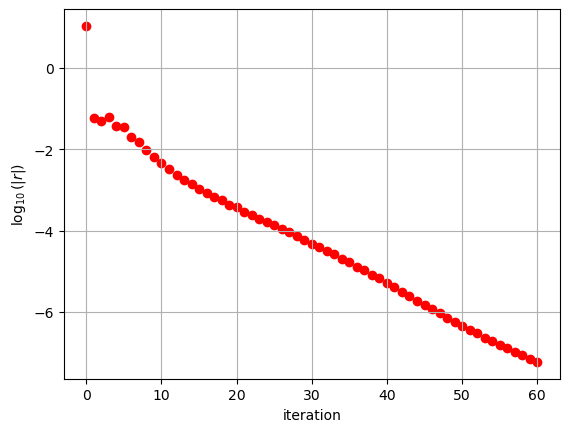

In [4]:
def test_problem_1():
    print('test_problem_1')
    nx = 80  # размерность пространства
    nt = 600  # параметр, контролирующий вид матрицы системы линейных уравнений
    niter = 60  # число итераций по методу би-сопряженнх градиентов
    smat = init_system_matrix_1d_problem_task_1(nx, nt)
    bvec = init_right_part_task_1(nx)

    # данную функцию надо реализовать
    u, r, res_norm = compute_solution_bcg(smat, bvec, niter)

    # график с десятичным логарифмом модуля вектора невязки
    plt.figure()
    plt.scatter(range(len(res_norm)), np.log10(res_norm), c='r')
    plt.xlabel('iteration')
    plt.ylabel(r'$\log_{10}(|r|)$')
    plt.grid()
    plt.show()

test_problem_1()

# Задача 2.
Ниже приведен код, который находит решение системы линейных уравнений по методу
наискорейшего спуска с предобуславливанием и без.

В качестве алгоритма для предобуславливания выбрано Неполное Разложение Холецкого.

Код написан для случая полных матриц.

Задача - модифициорвать код для работы с разреженными матрицами:
иными словами, предполагается, что во всех вычислениях допускаются операции только с
разреженными матрицами из-за ограничений памяти.

Фукнции, требующие модификации содержат комментарий:
"НЕОБХОДИМО ПРИВЕСТИ К ФОРМАТУ РАЗРЕЖЕННЫХ МАТРИЦ".

In [5]:
def init_system_matrix_1d_problem_task_2(nx, nt):
    # инициализация тридиагональной матрицы системы линейных уравнений
    # НЕОБХОДИМО ПРИВЕСТИ К ФОРМАТУ РАЗРЕЖЕННЫХ МАТРИЦ
    dt = 1.0 / nt
    dx = 1.0 / nx
    smat = np.zeros((nx, nx))
    # diagonal elements
    smat[0, 0] = 1.0 + 0.5 * dt / dx / dx
    for idx in range(1, nx - 1):
        smat[idx, idx] = 1.0 + 1.0 * dt / dx / dx
    smat[nx - 1, nx - 1] = 1.0 + 0.5 * dt / dx / dx
    # off-diagonal elements
    for idx in range(0, nx - 1):
        smat[idx, idx + 1] = - 0.5 * dt / dx / dx
        smat[idx + 1, idx] = - 0.5 * dt / dx / dx
    return smat

def init_right_part_task_2(nx):
    # инициализация правой части
    xnode = np.linspace(0.5 / nx, 1.0 - 0.5 / nx, nx)
    b = 0.2 + 1.6 * np.cos(2.0 * np.pi * xnode) - 0.2 * np.sin(1.0 * np.pi * xnode)
    return b

Алгоритм наискорейшего спуска для разреженных матриц без предобуславливания:

In [6]:
def init_gd(smat, bvec):
    # НЕОБХОДИМО ПРИВЕСТИ К ФОРМАТУ РАЗРЕЖЕННЫХ МАТРИЦ
    x0 = np.zeros(bvec.shape)
    r0 = bvec - np.dot(smat, x0)
    d0 = r0.copy()
    return x0, r0, d0

def single_step_gd(smat, x0, r0, d0):
    # НЕОБХОДИМО ПРИВЕСТИ К ФОРМАТУ РАЗРЕЖЕННЫХ МАТРИЦ
    eps = 1.0e-10
    v0 = np.dot(smat, d0)
    alpha = np.dot(r0, r0) / max(eps, np.dot(d0, v0))
    x1 = x0 + alpha * d0
    r1 = r0 - alpha * v0
    d1 = r1.copy()
    return x1, r1, d1

def compute_solution_gd(smat, bvec, niter):
    # НЕОБХОДИМО ПРИВЕСТИ К ФОРМАТУ РАЗРЕЖЕННЫХ МАТРИЦ
    x0, r0, d0 = init_gd(smat, bvec)
    res = np.zeros((niter + 1))
    for kiter in range(niter):
        res[kiter] = np.sqrt(np.dot(r0, r0))
        x1, r1, d1 = single_step_gd(smat, x0, r0, d0)
        x0 = x1.copy()
        r0 = r1.copy()
        d0 = d1.copy()
    res[niter] = np.sqrt(np.dot(r0, r0))
    return x0, r0, res

Алгоритм наискорейшего спуска с предобуславливанием

In [7]:
def solve_l_system(lmat, bvec):
    # решение системы линейных уравнений с нижнетреугольной матрицей
    # НЕОБХОДИМО ПРИВЕСТИ К ФОРМАТУ РАЗРЕЖЕННЫХ МАТРИЦ
    nx = bvec.size
    x = np.zeros(nx)
    x[0] = bvec[0] / lmat[0, 0]
    for idx in range(1, nx):
        x[idx] = (bvec[idx] - np.dot(lmat[idx, :idx], x[: idx])) / lmat[idx, idx]
    return x

def solve_u_system(umat, bvec):
    # решение системы линейных уравнений с верхнетреугольной матрицей
    # НЕОБХОДИМО ПРИВЕСТИ К ФОРМАТУ РАЗРЕЖЕННЫХ МАТРИЦ
    nx = bvec.size
    x = np.zeros(nx)
    x[nx - 1] = bvec[nx - 1] / umat[nx - 1, nx - 1]
    for idx in range(1, nx):
        j = nx - 1 - idx
        x[j] = (bvec[j] - np.dot(umat[j, (j + 1):], x[(j + 1):])) / umat[j, j]
    return x

def init_gd_prec(smat, lmat, bvec):
    # НЕОБХОДИМО ПРИВЕСТИ К ФОРМАТУ РАЗРЕЖЕННЫХ МАТРИЦ
    x0 = np.zeros(bvec.shape)
    r0 = bvec - np.dot(smat, x0)
    d0 = r0.copy()
    d0 = solve_u_system(np.transpose(lmat), d0)
    d0 = solve_l_system(lmat, d0)
    return x0, r0, d0

def single_step_gd_prec(smat, lmat, x0, r0, d0):
    # НЕОБХОДИМО ПРИВЕСТИ К ФОРМАТУ РАЗРЕЖЕННЫХ МАТРИЦ
    eps = 1.0e-10
    v0 = np.dot(smat, d0)
    alpha = np.dot(r0, d0) / max(eps, np.dot(d0, v0))
    x1 = x0 + alpha * d0
    r1 = r0 - alpha * v0
    d1 = solve_u_system(np.transpose(lmat), r1)
    d1 = solve_l_system(lmat, d1)
    return x1, r1, d1

def compute_solution_gd_prec(smat, lmat, bvec, niter):
    # НЕОБХОДИМО ПРИВЕСТИ К ФОРМАТУ РАЗРЕЖЕННЫХ МАТРИЦ
    x0, r0, d0 = init_gd_prec(smat, lmat, bvec)
    res = np.zeros((niter + 1))
    for kiter in range(niter):
        res[kiter] = np.sqrt(np.dot(r0, r0))
        x1, r1, d1 = single_step_gd_prec(smat, lmat, x0, r0, d0)
        x0 = x1.copy()
        r0 = r1.copy()
        d0 = d1.copy()
    res[niter] = np.sqrt(np.dot(r0, r0))
    return x0, r0, res

Алгоритм неполного разложения Холецкого (аналогичен полному разложению)

In [8]:
def compute_incomplete_cholesky_factorization(smat):
    # НЕОБХОДИМО ПРИВЕСТИ К ФОРМАТУ РАЗРЕЖЕННЫХ МАТРИЦ
    lmat = np.zeros(smat.shape) # нижнетреугольная матрица
    nx = smat.shape[0]
    for idx_row in range(nx):
        # compute row of lmat
        if idx_row >= 1:
            for idx_col in range(idx_row - 1, idx_row):
                lmat[idx_row, idx_col] = (smat[idx_row, idx_col] - np.dot(lmat[idx_row, (idx_row - 1) : idx_col], lmat[idx_col, (idx_row - 1) : idx_col])) / lmat[idx_col, idx_col]
        lmat[idx_row, idx_row] = np.sqrt(smat[idx_row, idx_row] - np.dot(lmat[idx_row, (idx_row - 1) : idx_row], lmat[idx_row, (idx_row - 1) : idx_row]))
    return lmat

test_problem_2


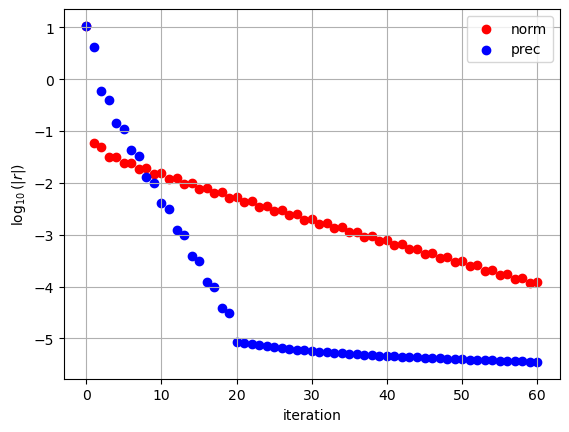

In [9]:
def test_problem_2():
    print('test_problem_2')
    nx = 80  # размерность пространства
    nt = 600  # параметр, контролирующий вид матрицы системы линейных уравнений
    niter = 60  # число итераций по методу наискорейшего спуска

    # инициализация системы линеййных уравнений
    smat = init_system_matrix_1d_problem_task_2(nx, nt)
    # вычиление нижнетреуголбной матрицы для предобуславливания
    lmat = compute_incomplete_cholesky_factorization(smat)
    # правая часть
    bvec = init_right_part_task_2(nx)
    # решение системы линейных уравнений без предобуславливания
    u, r, res_norm = compute_solution_gd(smat, bvec, niter)
    # решение системы линейных уравнений с предобуславливанием
    u, r, res_prec = compute_solution_gd_prec(smat, lmat, bvec, niter)

    # график с десятичным логарифмом модуля вектора невязки
    plt.figure()
    plt.scatter(range(len(res_norm)), np.log10(res_norm), c='r', label='norm')
    plt.scatter(range(len(res_norm)), np.log10(res_prec), c='b', label='prec')
    plt.xlabel('iteration')
    plt.ylabel(r'$\log_{10}(|r|)$')
    plt.legend()
    plt.grid()
    plt.show()

test_problem_2()

# Задача 3.
Ниже приведен код, который находит решение системы линейных уравнений по методу
сопряженных градиентов с предобуславливанием и без.

В качестве алгоритма для предобуславливания выбрано Неполное Разложение Холецкого.

Код написан для случая полных матриц.

Задача - модифициорвать код для работы с разреженными матриццами:
иными словами, предполагается, что во всех вычислениях допускаются операции только с
разреженными матрицами из-за ограничений памяти.

Фукнции, требующие модификации содержат комментарий:
"НЕОБХОДИМО ПРИВЕСТИ К ФОРМАТУ РАЗРЕЖЕННЫХ МАТРИЦ".

In [10]:
def init_system_matrix_1d_problem_task_3(nx, nt):
    # инициализация тридиагональной матрицы системы линейных уравнений
    # НЕОБХОДИМО ПРИВЕСТИ К ФОРМАТУ РАЗРЕЖЕННЫХ МАТРИЦ
    dt = 1.0 / nt
    dx = 1.0 / nx
    smat = np.zeros((nx, nx))
    # diagonal elements
    smat[0, 0] = 1.0 + 0.5 * dt / dx / dx
    for idx in range(1, nx - 1):
        smat[idx, idx] = 1.0 + 1.0 * dt / dx / dx
    smat[nx - 1, nx - 1] = 1.0 + 0.5 * dt / dx / dx
    # off-diagonal elements
    for idx in range(0, nx - 1):
        smat[idx, idx + 1] = - 0.5 * dt / dx / dx
        smat[idx + 1, idx] = - 0.5 * dt / dx / dx
    return smat

def init_right_part_task_3(nx):
    # инициализация правой части
    xnode = np.linspace(0.5 / nx, 1.0 - 0.5 / nx, nx)
    b = 0.2 + 1.6 * np.cos(2.0 * np.pi * xnode) - 0.2 * np.sin(1.0 * np.pi * xnode)
    return b

Алгоритм сопряженных градиентов для разреженных матриц без предобуславливания

In [11]:
def init_cgd(smat, bvec):
    # НЕОБХОДИМО ПРИВЕСТИ К ФОРМАТУ РАЗРЕЖЕННЫХ МАТРИЦ
    x0 = np.zeros(bvec.shape)
    r0 = bvec - np.dot(smat, x0)
    d0 = r0.copy()
    return x0, r0, d0

def single_step_cgd(smat, x0, r0, d0):
    # НЕОБХОДИМО ПРИВЕСТИ К ФОРМАТУ РАЗРЕЖЕННЫХ МАТРИЦ
    eps = 1.0e-10
    v0 = np.dot(smat, d0)
    alpha = np.dot(r0, r0) / max(eps, np.dot(d0, v0))
    x1 = x0 + alpha * d0
    r1 = r0 - alpha * v0
    beta = np.dot(r1, r1) / max(eps, np.dot(r0, r0))
    d1 = r1 + beta * d0
    return x1, r1, d1

def compute_solution_cgd(smat, bvec, niter):
    # НЕОБХОДИМО ПРИВЕСТИ К ФОРМАТУ РАЗРЕЖЕННЫХ МАТРИЦ
    x0, r0, d0 = init_cgd(smat, bvec)
    res = np.zeros((niter + 1))
    for kiter in range(niter):
        res[kiter] = np.sqrt(np.dot(r0, r0))
        x1, r1, d1 = single_step_cgd(smat, x0, r0, d0)
        x0 = x1.copy()
        r0 = r1.copy()
        d0 = d1.copy()
    res[niter] = np.sqrt(np.dot(r0, r0))
    return x0, r0, res

Алгоритм сопряженных градиентов для разреженных матриц с предобуславливанием

In [12]:
def solve_l_system(lmat, bvec):
    # решение системы линейных уравнений с нижнетреугольной матрицей
    # НЕОБХОДИМО ПРИВЕСТИ К ФОРМАТУ РАЗРЕЖЕННЫХ МАТРИЦ
    nx = bvec.size
    x = np.zeros(nx)
    x[0] = bvec[0] / lmat[0, 0]
    for idx in range(1, nx):
        x[idx] = (bvec[idx] - np.dot(lmat[idx, :idx], x[: idx])) / lmat[idx, idx]
    return x

def solve_u_system(umat, bvec):
    # решение системы линейных уравнений с верхнетреугольной матрицей
    # НЕОБХОДИМО ПРИВЕСТИ К ФОРМАТУ РАЗРЕЖЕННЫХ МАТРИЦ
    nx = bvec.size
    x = np.zeros(nx)
    x[nx - 1] = bvec[nx - 1] / umat[nx - 1, nx - 1]
    for idx in range(1, nx):
        j = nx - 1 - idx
        x[j] = (bvec[j] - np.dot(umat[j, (j + 1):], x[(j + 1):])) / umat[j, j]
    return x

def init_cgd_prec(smat, lmat, bvec):
    # НЕОБХОДИМО ПРИВЕСТИ К ФОРМАТУ РАЗРЕЖЕННЫХ МАТРИЦ
    x0 = np.zeros(bvec.shape)
    r0 = bvec - np.dot(smat, x0)
    d0 = r0.copy()
    d0 = solve_l_system(lmat, d0)
    d0 = solve_u_system(np.transpose(lmat), d0)
    s0 = d0.copy()
    return x0, r0, s0, d0

def single_step_cgd_prec(smat, lmat, x0, r0, s0, d0):
    # НЕОБХОДИМО ПРИВЕСТИ К ФОРМАТУ РАЗРЕЖЕННЫХ МАТРИЦ
    eps = 1.0e-10
    v0 = np.dot(smat, d0)
    alpha = np.dot(r0, s0) / max(eps, np.dot(d0, v0))
    x1 = x0 + alpha * d0
    r1 = r0 - alpha * v0
    s1 = solve_l_system(lmat, r1)
    s1 = solve_u_system(np.transpose(lmat), s1)
    beta = np.dot(r1, s1) / max(eps, np.dot(r0, s0))
    d1 = s1 + beta * d0
    return x1, r1, s1, d1

def compute_solution_cgd_prec(smat, lmat, bvec, niter):
    # НЕОБХОДИМО ПРИВЕСТИ К ФОРМАТУ РАЗРЕЖЕННЫХ МАТРИЦ
    x0, r0, s0, d0 = init_cgd_prec(smat, lmat, bvec)
    res = np.zeros((niter + 1))
    for kiter in range(niter):
        res[kiter] = np.sqrt(np.dot(r0, r0))
        x1, r1, s1, d1 = single_step_cgd_prec(smat, lmat, x0, r0, s0, d0)
        x0 = x1.copy()
        r0 = r1.copy()
        s0 = s1.copy()
        d0 = d1.copy()
    res[niter] = np.sqrt(np.dot(r0, r0))
    return x0, r0, res

Алгоритм неполного разложения Холецкого (аналогичен полному разложению)

In [13]:
def compute_incomplete_cholesky_factorization(smat):
    # НЕОБХОДИМО ПРИВЕСТИ К ФОРМАТУ РАЗРЕЖЕННЫХ МАТРИЦ
    lmat = np.zeros(smat.shape) # нижнетреугольная матрица
    nx = smat.shape[0]
    for idx_row in range(nx):
        # compute row of lmat
        if idx_row >= 1:
            for idx_col in range(idx_row - 1, idx_row):
                lmat[idx_row, idx_col] = (smat[idx_row, idx_col] - np.dot(lmat[idx_row, (idx_row - 1) : idx_col], lmat[idx_col, (idx_row - 1) : idx_col])) / lmat[idx_col, idx_col]
        lmat[idx_row, idx_row] = np.sqrt(smat[idx_row, idx_row] - np.dot(lmat[idx_row, (idx_row - 1) : idx_row], lmat[idx_row, (idx_row - 1) : idx_row]))
    return lmat

test_problem_3


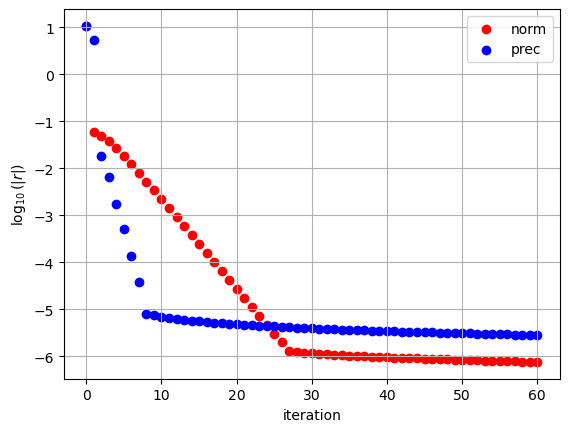

In [14]:
def test_problem_3():
    print('test_problem_3')
    nx = 80  # размерность пространства
    nt = 600  # параметр, контролирующий вид матрицы системы линейных уравнений
    niter = 60  # число итераций по методу сопряженных градиентов

    # инициализация системы линеййных уравнений
    smat = init_system_matrix_1d_problem_task_3(nx, nt)
    # вычисление нижнетреугольной матрицы для предобуславливания
    lmat = compute_incomplete_cholesky_factorization(smat)
    # правая часть
    bvec = init_right_part_task_3(nx)
    # рещение системы линейных уравнений без предобуславливания
    u, r, res_norm = compute_solution_cgd(smat, bvec, niter)
    # решение системы линейных уравнений с предобуславливанием
    u, r, res_prec = compute_solution_cgd_prec(smat, lmat, bvec, niter)

    # график с десятичным логарифмом модуля вектора невязки
    plt.figure()
    plt.scatter(range(len(res_norm)), np.log10(res_norm), c='r', label='norm')
    plt.scatter(range(len(res_norm)), np.log10(res_prec), c='b', label='prec')
    plt.xlabel('iteration')
    plt.ylabel(r'$\log_{10}(|r|)$')
    plt.legend()
    plt.grid()
    plt.show()

test_problem_3()

# Задача 4.
## Описание задачи.
Рассмотрим квадрат $Q = [0; 1] \times [0; 1]$.
Введем прямоугольную сетку $n \times n$ (разобьем квадрат на $n^2$ равных квадратов).

Рассматривать кусочно-постоянные функции на квадрате $Q$,
такие, что данные функции постоянны внутри каждого из маленьких квадатиков.

Такие функции образуют линейное пространство размерности $n^2$:
координата ветора - значение фукции в центре заданного блока (маленького) квадрата.

На данном линеном пространстве можно ввести скалярное произведение через матрицу Грама:
$$
G_{IJ} = \exp\bigg( \frac{-|x_J - x_I|}{\sigma} \bigg )
$$
$\sigma$ - радиус корреляции, $x_I, x_J$ - координанте векторы блоков с индексами $I$ и $J$ соответственно.

Индекс блока $I$ вычисляются по его паре индексов $(i, j)$ следующим образом:
$$
I = n * i + j
$$
Вектор координат $x_I$ вычисляется слудующим образом:
$$
x_I = \bigg[\frac{i + 1/2}{n}, \frac{j + 1/2}{n}\bigg]^\top
$$

Матрица Грама вычисляется в функции `generate_gram_matrix`.

Переход от вектора к таблице значений функций двух аргументов происходит следующим при помощи классических методов:

вектор -> таблица `some_table` = `some_vector.reshape(n, n)`

таблица -> вектор `some_vector` = `some_table.flatten()`


## Задание:
Вычислить собственные функции и собственные векторы матрицы $G$ для следующих значений
$n = 10, 30, 100$ и для следующих значений $\sigma = 0.1, 0.3, 0.9$.

Для каждого значения $n$ пронумеровать собственные векторы в порядке убывания собственных значений. Для каждого значения $n$ gосторить на одном графике (`plt.scatter`) функции $k$ vs $\lambda_k$ для трех разных значений $\sigma$. Здесь $k$ - номер собственного значения, $\lambda_k$ - собственное значение.

Для каждого значения $n$ и $\sigma$ посторить графики (`plt.imshow`) $10$ собственных функции с наибольшими значениями.

In [ ]:
@jit(nopython=True, fastmath=True)
def generate_grid(nx, ny):
    mesh_data = np.zeros((nx, ny, 2))
    for kx in range(nx):
        for ky in range(ny):
            mesh_data[kx, ky, 0] = (0.5 + kx) / nx
            mesh_data[kx, ky, 1] = (0.5 + ky) / ny
    return mesh_data

@jit(nopython=True, fastmath=True)
def distance_matrix(mesh_data):
    nx, ny, _ = mesh_data.shape
    n_block = nx * ny
    dist_mat = np.zeros((n_block, n_block))
    for kx0 in range(nx):
        for kx1 in range(nx):
            for ky0 in range(ny):
                for ky1 in range(ny):
                    idx_0 = ny * kx0 + ky0
                    idx_1 = ny * kx1 + ky1
                    diff = mesh_data[kx1, ky1, :] - mesh_data[kx0, ky0, :]
                    dist_mat[idx_0, idx_1] = np.sqrt(np.sum(diff * diff))
    return dist_mat

def generate_gram_matrix(n, sigma):
    mesh_data = generate_grid(n, n)
    dist_mat = distance_matrix(mesh_data)
    gram_mat = np.exp(- dist_mat / sigma)
    return gram_mat

# Задача 5.
## Описание задачи.
Рассмотрим $n$ точек в $d$-мерном пространстве. По заданному множеству точек (сэмплов) можно посторить полный граф, вершинами которого являются точки, а ребрам назначен вес:
$$
W_{ij} = \exp\bigg(-\gamma |x_j - x_i|^2\bigg)
$$
Здесь $x_i, x_j$ - координатные векторы сэмлов с индексами $i$ и $j$ соответственно,
$\gamma$ - параметр.


По матрице весов строится диагональная матрица с элементами:
$$
D_{ii} = \sum_{j=1}^{n} W_{ij}
$$
По матрицам $D$ и $W$ Строится матрица дискретного оператора Лапласа:
$$
L = D^{-1/2} \big( D - W \big) D^{-1/2}
$$
Данный оператор является симметричным и положительно определенным.

Собственные векторы дискретного оператора Лапласа можно интерпретировать как функции: координата вектора

## Задание:
Используя нижеприведенную функцию `generate_data` сгенерируте массив из $600$ точек на плоскости. Вычислите матрицу весов $W$ для $\gamma = 10.0$. Вычислите матрицу Лапласа $L$ и ее четыре наименьшие собственные значения и соответствующие им собственные функции.

Постойте график (`scatter.plot`): по оси $X$ - индекс точки в датасете, по оси $Y$ - значение собственной функции в данной точке. Графики всех четырех собственных функций следует отобразить на одном графике (с легендой), точки, соответствующие значениям одной и той же собственной функции выделить одинакоывми цветами, точки, соответствующие разным собственным функциям - разными цветами. Можно ли различить кластеры визуально?

In [ ]:
def generate_data(ndata):
    # random angles
    phi = 2.0 * np.pi * np.random.rand(3 * ndata)
    # coordinates
    xdata = np.zeros((phi.size, 2))
    # circles of different radius
    r0 = 1.0
    r1 = 2.0
    r2 = 3.0
    # data for cluster 0:
    idx_0 = 0 * ndata
    idx_1 = 1 * ndata
    xdata[idx_0 : idx_1, 0] = r0 * np.cos(phi[idx_0 : idx_1])
    xdata[idx_0 : idx_1, 1] = r0 * np.sin(phi[idx_0 : idx_1])
    # data for cluster 1:
    idx_0 = 1 * ndata
    idx_1 = 2 * ndata
    xdata[idx_0 : idx_1, 0] = r1 * np.cos(phi[idx_0 : idx_1])
    xdata[idx_0 : idx_1, 1] = r1 * np.sin(phi[idx_0 : idx_1])
    # data for cluster 2:
    idx_0 = 2 * ndata
    idx_1 = 3 * ndata
    xdata[idx_0 : idx_1, 0] = r2 * np.cos(phi[idx_0 : idx_1])
    xdata[idx_0 : idx_1, 1] = r2 * np.sin(phi[idx_0 : idx_1])
    return xdata

In [ ]:
def test_problem_5():
    print('inside the main function')
    ndata = 200
    xdata = generate_data(ndata)
    plt.figure()
    idx_0 = 0 * ndata
    idx_1 = 1 * ndata
    plt.scatter(xdata[idx_0 : idx_1, 0], xdata[idx_0 : idx_1, 1], c='r', label='cluster 0')
    idx_0 = 1 * ndata
    idx_1 = 2 * ndata
    plt.scatter(xdata[idx_0 : idx_1, 0], xdata[idx_0 : idx_1, 1], c='g', label='cluster 1')
    idx_0 = 2 * ndata
    idx_1 = 3 * ndata
    plt.scatter(xdata[idx_0 : idx_1, 0], xdata[idx_0 : idx_1, 1], c='b', label='cluster 2')
    plt.legend()
    plt.grid()
    plt.show()
    return 0

test_problem_5()